In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup completed!")

Setup completed!


## 1. Analiza skupa podataka **[7 bodova]** 

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
print(f"Number of instances: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of instances: 918
Number of columns: 12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Kategoricki atributi su: Sex,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease, ChestPainType
Binarni su: Sex,FastingBS,ExerciseAngina,HeartDisease
Viseklasni:RestingECG,ChestPainType,ST_Slope
Numericki atributi su: Age,RestingBP,Cholesterol,MaxHR,Oldpeak

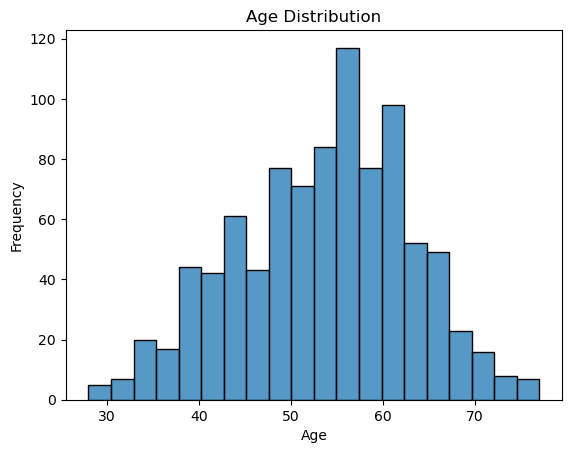

In [9]:
# plot distribution of age
sns.histplot(df['Age'], kde=False, bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [10]:
print(f"Minimum age: {df.Age.min()}")
print(f"Maximum age: {df.Age.max()}")

Minimum age: 28
Maximum age: 77


Text(0.5, 1.0, 'Average Number of Disease Cases by Age Decade')

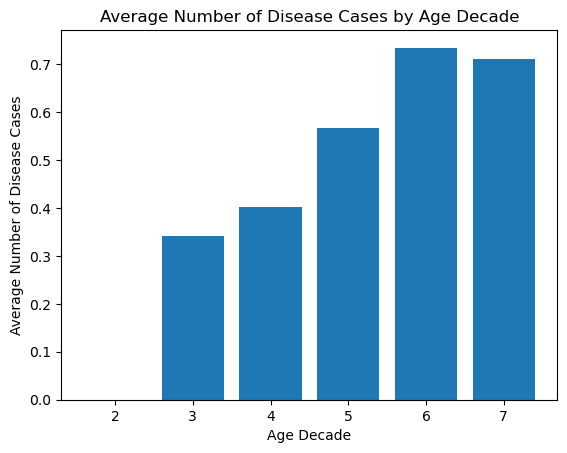

In [11]:
# create new column that bins the age by decade of life
age_decade = pd.DataFrame({"Decade": df["Age"].apply(lambda x: int(x/10)), 
                           "Target": df["HeartDisease"]})
# group by age decade and calculate average number of disease cases
age_decade_avg = age_decade.groupby("Decade").mean()
# plot average number of disease cases by age decade
plt.bar(age_decade_avg.index, age_decade_avg["Target"])
plt.xlabel("Age Decade")
plt.ylabel("Average Number of Disease Cases")
plt.title("Average Number of Disease Cases by Age Decade")

## 2. Priprema skupa podataka **[5 bodova]**

In [12]:
# convert binary columns to 0 and 1
df["Sex"] = df["Sex"].map(lambda x: 1 if x == 'M' else 0)
df["ExerciseAngina"] = df["ExerciseAngina"].map(lambda x: 1 if x == 'Y' else 0)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [13]:
# one-hot encode categorical columns to numeric 0 and 1
df = pd.get_dummies(df, columns=["ChestPainType", "RestingECG", "ST_Slope"], dtype=int)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [14]:
# split dataset into features and labels
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (918, 18)
y shape: (918,)


In [15]:
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print("Training set size: ", X_train.shape)
print("Testing set size: ", X_test.shape)
print("Training label size: ", y_train.shape)
print("Testing label size: ", y_test.shape)

Training set size:  (642, 18)
Testing set size:  (276, 18)
Training label size:  (642,)
Testing label size:  (276,)


In [16]:
# normalize features
def normalize(X):
    return (X - X.min()) / (X.max() - X.min())

cols_to_normalize = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
X_train[cols_to_normalize] = normalize(X_train[cols_to_normalize])
X_test[cols_to_normalize] = normalize(X_test[cols_to_normalize])
X_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
712,0.604167,1,0.50,0.388060,0,0.712,0,0.306818,1,0,0,0,0,1,0,0,0,1
477,0.666667,1,0.55,0.000000,1,0.328,1,0.522727,1,0,0,0,0,1,0,1,0,0
409,0.500000,1,0.80,0.000000,1,0.440,1,0.295455,0,0,1,0,1,0,0,0,1,0
448,0.708333,1,0.80,0.381426,1,0.304,1,0.409091,1,0,0,0,0,1,0,0,1,0
838,0.708333,1,0.65,0.547264,1,0.520,1,0.500000,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.395833,0,0.60,0.421227,0,0.344,0,0.295455,1,0,0,0,0,0,1,0,0,1
270,0.333333,1,0.60,0.373134,0,0.584,0,0.295455,1,0,0,0,0,1,0,0,0,1
860,0.645833,1,0.65,0.419569,0,0.616,1,0.454545,1,0,0,0,0,1,0,0,0,1
435,0.645833,1,0.76,0.000000,0,0.408,1,0.295455,1,0,0,0,0,0,1,0,0,1


## 3. Treniranje osnovnog (baseline) modela **[5 bodova]**

In [18]:
# create logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
train_acc = accuracy_score(y_train, clf.predict(X_train))
print(f"Train Accuracy = {train_acc}")
y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy = {test_acc}")

Train Accuracy = 0.8629283489096573
Test Accuracy = 0.8695652173913043


Rezultati na trening i test skupu su veoma bliski tako da nema overfitting-a. Sa druge strane, videćemo da rezultati na test skupu mogu da idu preko 90%, tako da ovde imamo blagi underfitting.

## 4. Treniranje random forest modela **[5 bodova]**

In [19]:
from sklearn.ensemble import RandomForestClassifier
min_samples_split = [2, 8, 16, 64]

for min_sample in min_samples_split:
    clf = RandomForestClassifier(min_samples_split=min_sample, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    print(f"Train Accuracy = {train_acc}")
    y_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy = {test_acc}")

Train Accuracy = 1.0
Test Accuracy = 0.8840579710144928
Train Accuracy = 0.942367601246106
Test Accuracy = 0.8840579710144928
Train Accuracy = 0.9018691588785047
Test Accuracy = 0.9021739130434783
Train Accuracy = 0.8504672897196262
Test Accuracy = 0.8695652173913043


Možemo primetiti kako povećanjem minimalnog broja instanci za deljenje čvora, dolazi do smanjenja efekta overfitting-a.

## 5. Podešavanje hiperparametara za random forest model **[3 boda]**

In [20]:
num_estimators = [300, 500, 800]
max_depth = [15, 20, 30]
min_samples_split = [4, 8, 16]

from sklearn.ensemble import RandomForestClassifier

best_acc = 0
best_params = None

for n_est in num_estimators:
    for depth in max_depth:
        for min_split in min_samples_split:
            clf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, min_samples_split=min_split, random_state=42)
            clf.fit(X_train, y_train)
            train_acc = accuracy_score(y_train, clf.predict(X_train))
            y_pred = clf.predict(X_test)
            test_acc = accuracy_score(y_test, y_pred)
            if test_acc > best_acc:
                best_acc = test_acc
                best_params = {"n_estimators": n_est, "max_depth": depth, "min_samples_split": min_split}
            print(f"n_estimators: {n_est}, max_depth: {depth}, min_samples_split: {min_split}")
            print(f"Train Accuracy = {train_acc}")
            print(f"Test Accuracy = {test_acc}")
            print()

print(best_acc)
print(best_params)


n_estimators: 300, max_depth: 15, min_samples_split: 4
Train Accuracy = 0.9875389408099688
Test Accuracy = 0.8840579710144928

n_estimators: 300, max_depth: 15, min_samples_split: 8
Train Accuracy = 0.942367601246106
Test Accuracy = 0.8985507246376812

n_estimators: 300, max_depth: 15, min_samples_split: 16
Train Accuracy = 0.9096573208722741
Test Accuracy = 0.9021739130434783

n_estimators: 300, max_depth: 20, min_samples_split: 4
Train Accuracy = 0.985981308411215
Test Accuracy = 0.8876811594202898

n_estimators: 300, max_depth: 20, min_samples_split: 8
Train Accuracy = 0.942367601246106
Test Accuracy = 0.8985507246376812

n_estimators: 300, max_depth: 20, min_samples_split: 16
Train Accuracy = 0.9096573208722741
Test Accuracy = 0.9021739130434783

n_estimators: 300, max_depth: 30, min_samples_split: 4
Train Accuracy = 0.985981308411215
Test Accuracy = 0.8876811594202898

n_estimators: 300, max_depth: 30, min_samples_split: 8
Train Accuracy = 0.942367601246106
Test Accuracy = 0.89855

In [21]:
print("Best parameters: ", best_params)
print("Best accuracy: ", best_acc)

Best parameters:  {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 16}
Best accuracy:  0.9057971014492754
